# import necessary python libraries to perform my tasks

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes


# Read the dataset using pandas

In [2]:

data = pd.read_csv('solar_measurements_benin_malanville_qc_year2.csv', 
                 parse_dates=['Timestamp'], 
                 encoding='ISO-8859-1') 
print(data.info())
print(data.describe())


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_973/2452480875.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('solar_measurements_benin_malanville_qc_year2.csv',
/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_973/2452480875.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('solar_measurements_benin_malanville_qc_year2.csv',


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525601 non-null  object 
 1   GHI            525601 non-null  object 
 2   DNI            525601 non-null  object 
 3   DHI            525601 non-null  object 
 4   ModA           525601 non-null  object 
 5   ModB           525601 non-null  object 
 6   Tamb           525601 non-null  object 
 7   RH             525601 non-null  object 
 8   WS             525601 non-null  object 
 9   WSgust         525601 non-null  object 
 10  WSstdev        525601 non-null  object 
 11  WD             525601 non-null  object 
 12  WDstdev        525601 non-null  object 
 13  BP             525601 non-null  object 
 14  Cleaning       525601 non-null  object 
 15  Precipitation  525601 non-null  object 
 16  TModA          525601 non-null  object 
 17  TModB          525601 non-nul

# Calculate additional metrics (mean, median, variance, skewness) for key columns:

In [3]:
data.head()

Timestamp   GHI   DNI   DHI  ModA  ModB  Tamb    RH   WS WSgust  \
0  yyyy-mm-dd hh:mm  W/m²  W/m²  W/m²  W/m²  W/m²    °C     %  m/s    m/s   
1  2022-08-09 00:01  -5.6  -0.1  -5.7     0     0  23.1  98.3  0.9    1.3   
2  2022-08-09 00:02  -5.5  -0.1  -5.6     0     0  23.1  98.3  0.9    1.1   
3  2022-08-09 00:03  -5.5  -0.1  -5.6     0     0  23.2  98.4  0.1    1.1   
4  2022-08-09 00:04  -5.5  -0.1  -5.6     0     0  23.2  98.4  0.1    1.1   

  WSstdev            WD WDstdev   BP Cleaning Precipitation TModA TModB  \
0     m/s  °N (to east)       °  hPa   1 or 0        mm/min    °C    °C   
1     0.5         115.3     4.8  996        0             0  23.5  22.9   
2     0.4         117.8     5.5  996        0             0  23.5  22.9   
3     0.3         105.4     0.9  996        0             0  23.5  22.9   
4     0.4         103.7     2.2  996        0             0  23.5  22.9   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

drop the first row because not numerical values

In [4]:
df = data.iloc[1:]
df.head()

Timestamp   GHI   DNI   DHI ModA ModB  Tamb    RH   WS WSgust  \
1  2022-08-09 00:01  -5.6  -0.1  -5.7    0    0  23.1  98.3  0.9    1.3   
2  2022-08-09 00:02  -5.5  -0.1  -5.6    0    0  23.1  98.3  0.9    1.1   
3  2022-08-09 00:03  -5.5  -0.1  -5.6    0    0  23.2  98.4  0.1    1.1   
4  2022-08-09 00:04  -5.5  -0.1  -5.6    0    0  23.2  98.4  0.1    1.1   
5  2022-08-09 00:05  -5.5  -0.1  -5.7    0    0  23.2  98.4  0.5    1.6   

  WSstdev     WD WDstdev   BP Cleaning Precipitation TModA TModB  Comments  
1     0.5  115.3     4.8  996        0             0  23.5  22.9       NaN  
2     0.4  117.8     5.5  996        0             0  23.5  22.9       NaN  
3     0.3  105.4     0.9  996        0             0  23.5  22.9       NaN  
4     0.4  103.7     2.2  996        0             0  23.5  22.9       NaN  
5     0.6   94.1     4.8  996        0             0  23.6  22.9       NaN

In [5]:
# Convert numeric columns to proper data types if needed
numeric_columns = df.columns[1:]  # Exclude Timestamp
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate summary statistics
summary_stats = df.describe()

# Display summary statistics
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      239.536629     170.156976     113.340359     236.835735   
std       331.563997     266.644811     156.440760     327.718231   
min       -16.400000      -6.300000     -16.100000       0.000000   
25%        -2.700000      -0.500000      -2.600000       0.000000   
50%         0.900000      -0.100000       0.900000       4.200000   
75%       480.600000     324.400000     214.700000     462.000000   
max      1454.000000     994.000000     806.000000    1399.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      229.144105      27.875447      58.111671       2.107215   
std       317.067317       6.209307      26.403998       1.640729   
min         0.000000      10.000000       4.200000       0.000000   
25%         0.000000      23.7000

/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_973/1994286074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


# Data Quality Check

In [6]:
numeric_columns = df.columns[1:]  # Exclude Timestamp
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# 1. Check for missing values
missing_values = df.isnull().sum()

# 2. Check for negative values in GHI, DNI, and DHI (should only be positive)
negative_values = {
    col: df[df[col] < 0].shape[0] for col in ['GHI', 'DNI', 'DHI'] if col in df.columns
}

# 3. Check for outliers using the IQR method (for ModA, ModB, WS, WSgust)
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

outlier_counts = {
    col: detect_outliers(col) for col in ['ModA', 'ModB', 'WS', 'WSgust'] if col in df.columns
}

# 4. Display results
print("Missing Values per Column:\n", missing_values)
print("\nNegative Values in GHI, DNI, and DHI:\n", negative_values)
print("\nOutlier Counts (IQR Method):\n", outlier_counts)

Missing Values per Column:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Negative Values in GHI, DNI, and DHI:
 {'GHI': 260363, 'DNI': 275879, 'DHI': 260338}

Outlier Counts (IQR Method):
 {'ModA': 226, 'ModB': 403, 'WS': 6088, 'WSgust': 6514}


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_973/2962335929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


# Time Series Analysis:

/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_973/73917860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert Timestamp to datetime
/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_973/73917860.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df.index.month
/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_973/73917860.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, 

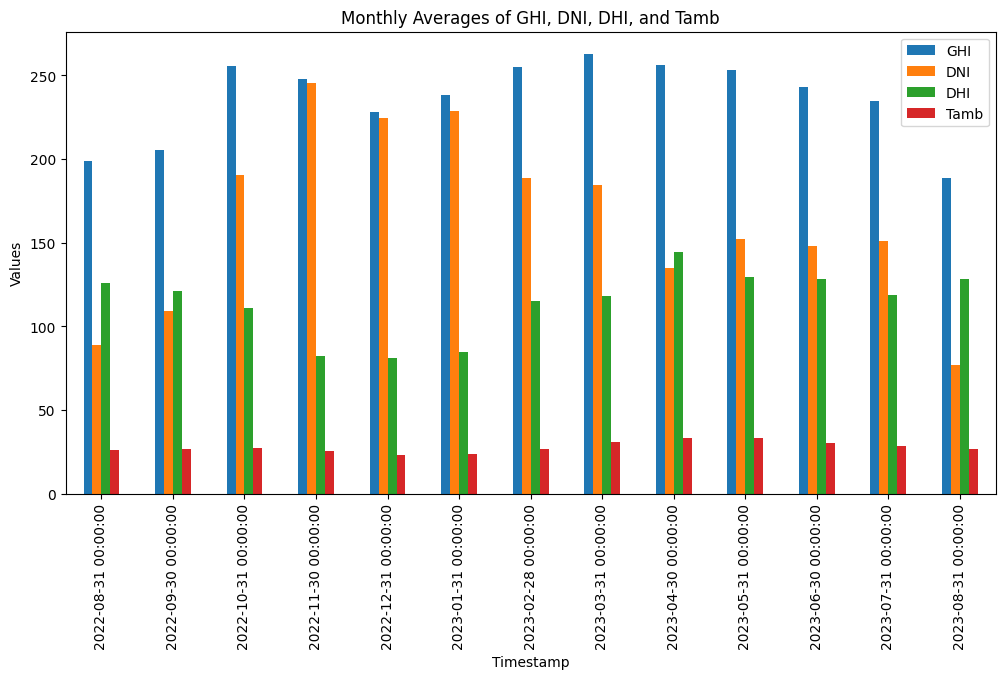

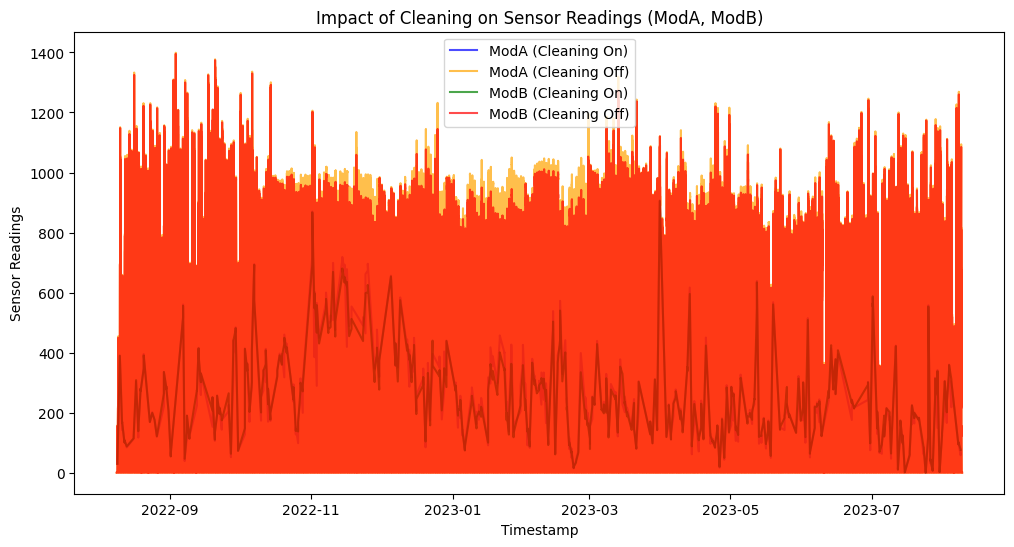

In [7]:


df.columns = ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 
              'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 
              'Precipitation', 'TModA', 'TModB', 'Comments']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert Timestamp to datetime
df.set_index('Timestamp', inplace=True)

# Resample data to monthly and daily averages for high-level trends
df['Month'] = df.index.month
monthly_means = df.resample('M').mean()
daily_means = df.resample('D').mean()

# 1. Time Series Plots for GHI, DNI, DHI, and Tamb
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GHI'], label='GHI', alpha=0.7)
plt.plot(df.index, df['DNI'], label='DNI', alpha=0.7)
plt.plot(df.index, df['DHI'], label='DHI', alpha=0.7)
plt.plot(df.index, df['Tamb'], label='Tamb (Temperature)', alpha=0.7)
plt.title('Time Series of Solar Irradiance and Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

# 2. Trends by Month: Bar Plot of Monthly Averages
monthly_means[['GHI', 'DNI', 'DHI', 'Tamb']].plot(
    kind='bar', figsize=(12, 6), title="Monthly Averages of GHI, DNI, DHI, and Tamb"
)
plt.ylabel('Values')
plt.show()

# 3. Cleaning Impact on Sensor Readings (ModA, ModB)
cleaning_on = df[df['Cleaning'] == 1]  # Filter rows with cleaning active
cleaning_off = df[df['Cleaning'] == 0]

plt.figure(figsize=(12, 6))
plt.plot(cleaning_on.index, cleaning_on['ModA'], label='ModA (Cleaning On)', color='blue', alpha=0.7)
plt.plot(cleaning_off.index, cleaning_off['ModA'], label='ModA (Cleaning Off)', color='orange', alpha=0.7)
plt.plot(cleaning_on.index, cleaning_on['ModB'], label='ModB (Cleaning On)', color='green', alpha=0.7)
plt.plot(cleaning_off.index, cleaning_off['ModB'], label='ModB (Cleaning Off)', color='red', alpha=0.7)
plt.title('Impact of Cleaning on Sensor Readings (ModA, ModB)')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Readings')
plt.legend()
plt.show()


# Correlation Analysis and Visualization:

/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_973/1336958793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


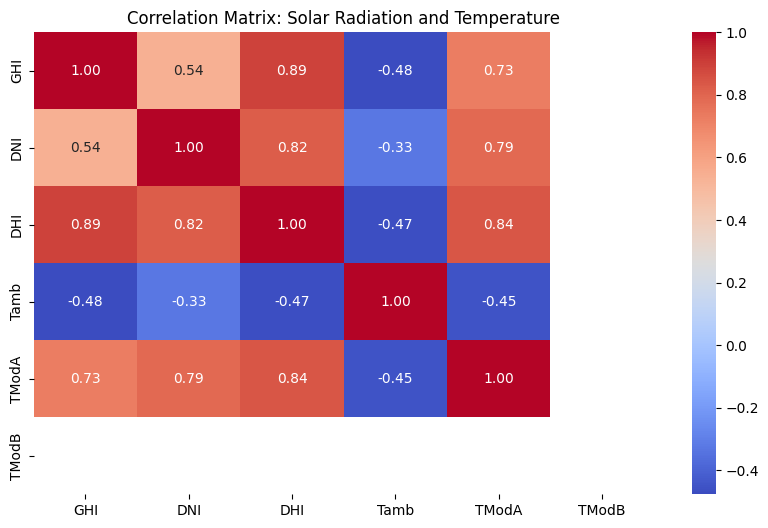

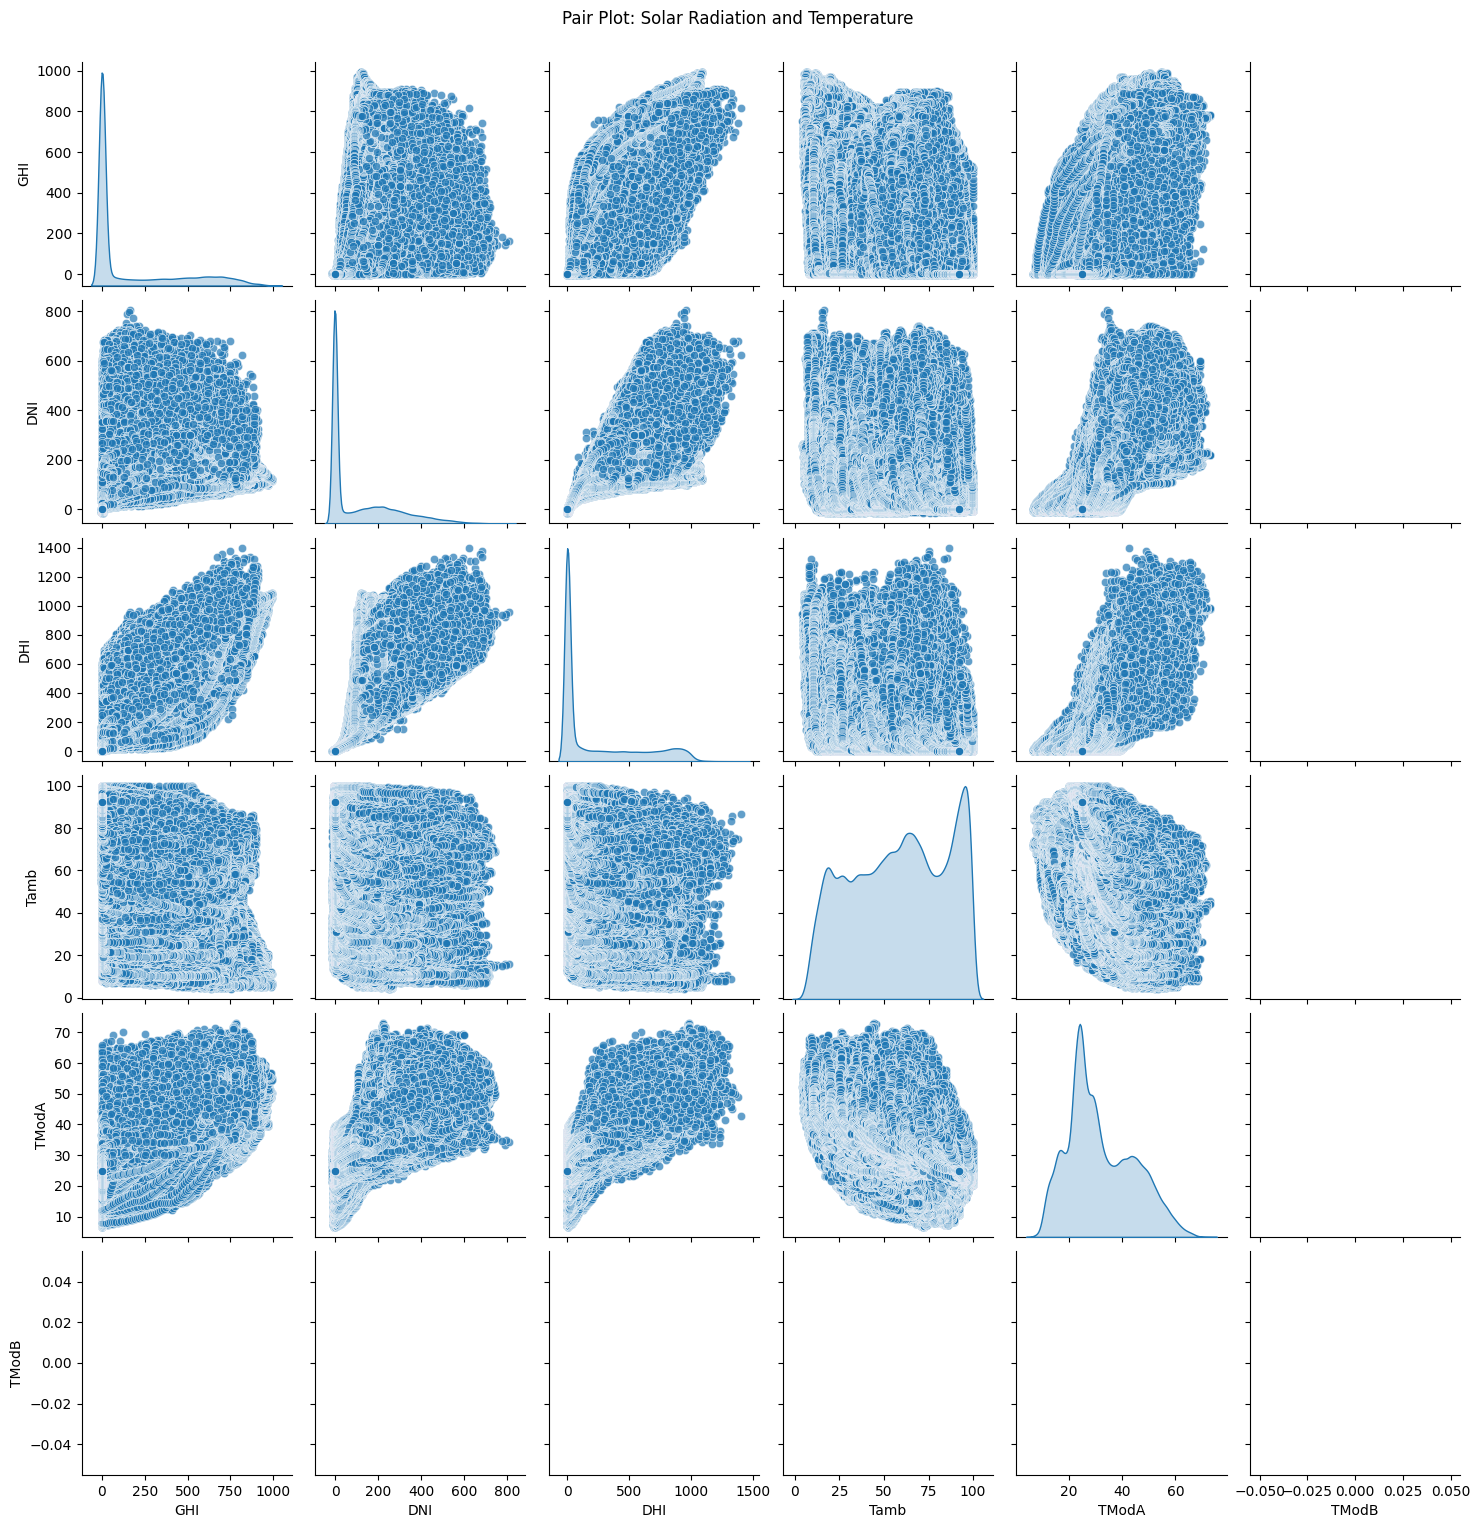

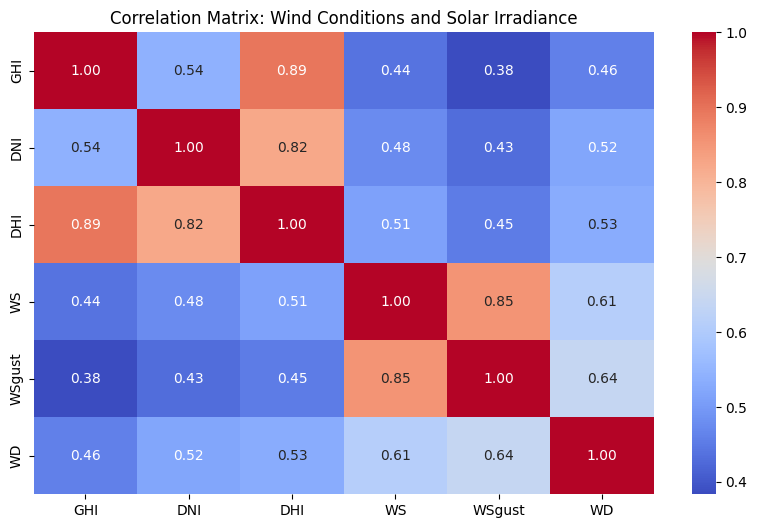

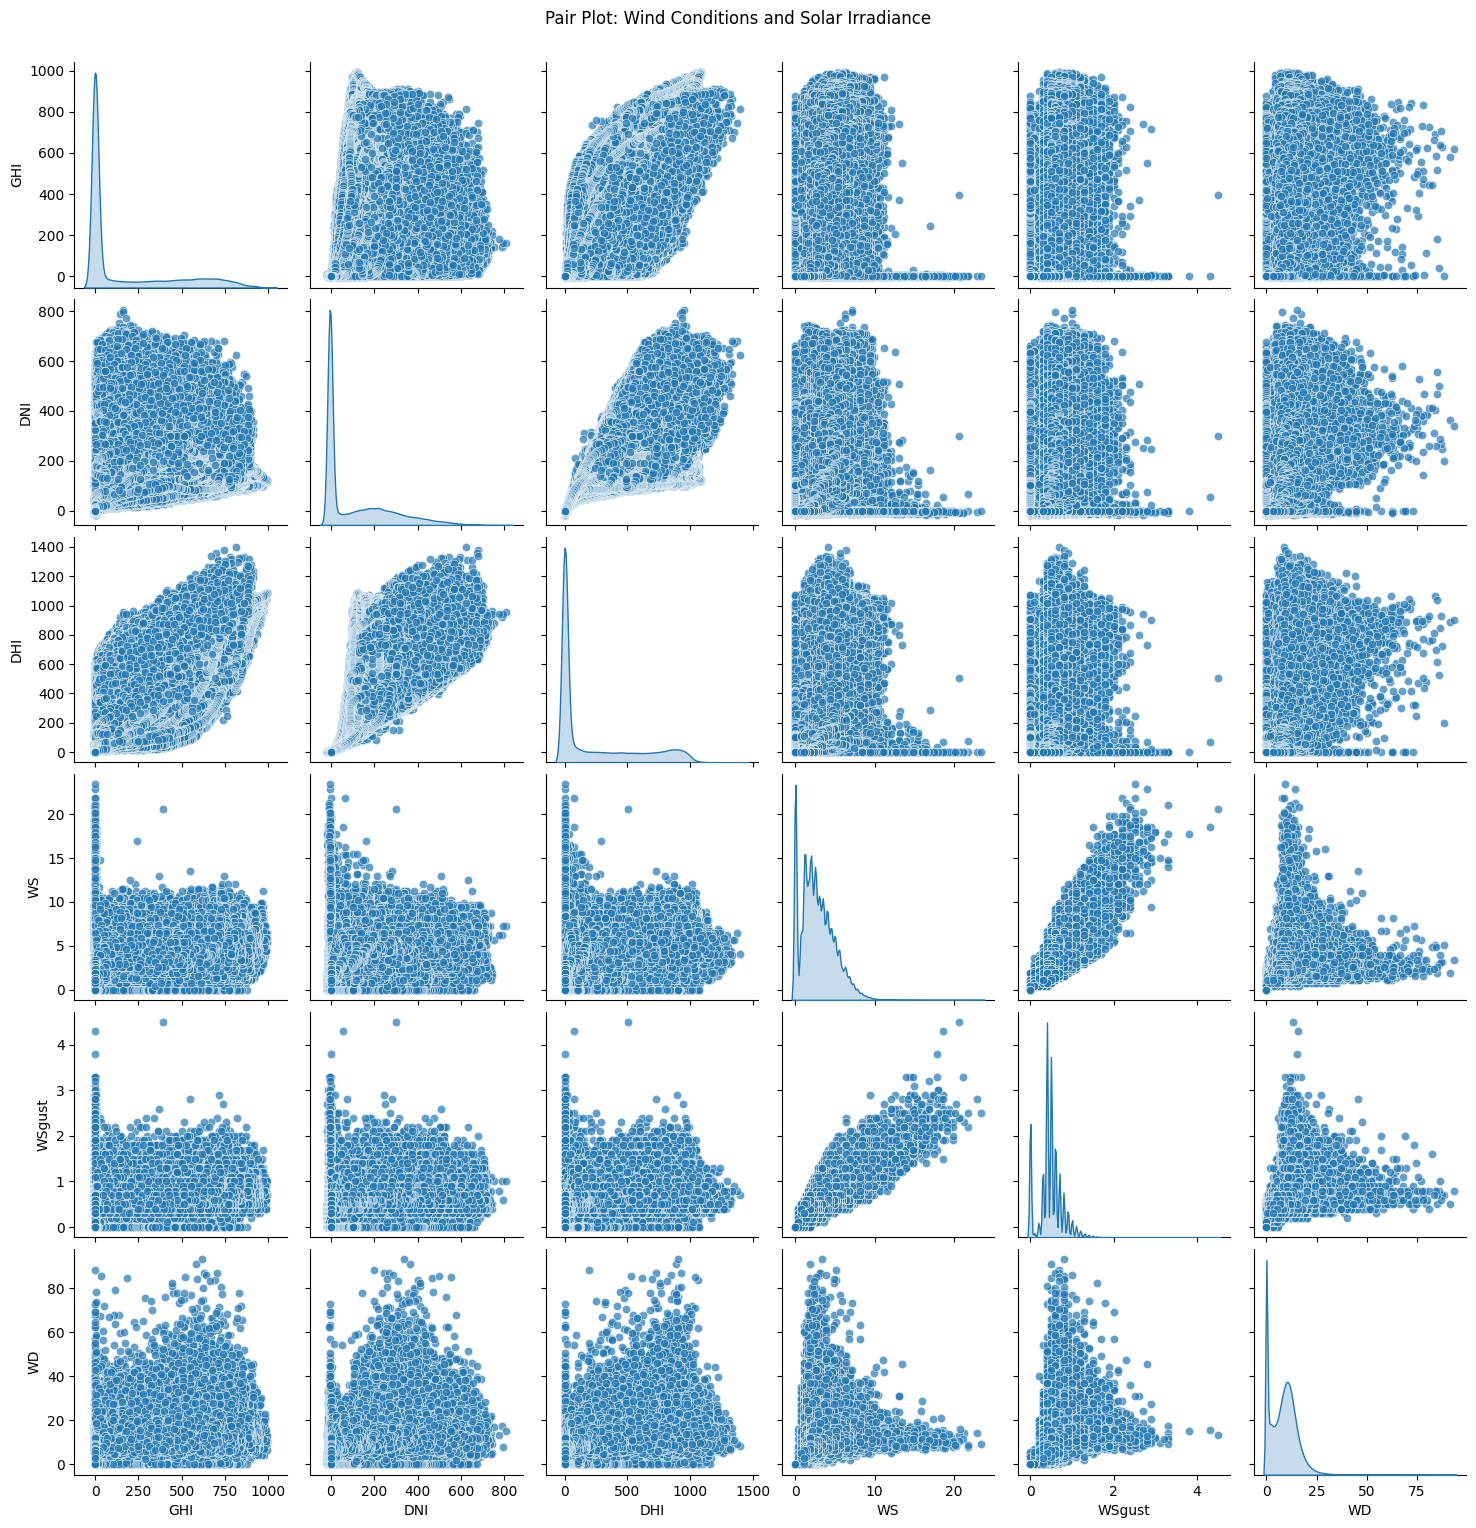

In [8]:



df.columns = ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 
              'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 
              'Precipitation', 'TModA', 'TModB', 'Comments']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# --- Correlation Matrix for Solar Radiation and Temperature ---
solar_temp_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB']
corr_matrix = df[solar_temp_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: Solar Radiation and Temperature')
plt.show()

# --- Pair Plot for Solar Radiation and Temperature ---
sns.pairplot(df[solar_temp_cols], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot: Solar Radiation and Temperature', y=1.02)
plt.show()

# --- Correlation Analysis for Wind Conditions and Solar Irradiance ---
wind_solar_cols = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']
wind_corr_matrix = df[wind_solar_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(wind_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix: Wind Conditions and Solar Irradiance')
plt.show()

# --- Scatter Matrix for Wind Conditions and Solar Irradiance ---
sns.pairplot(df[wind_solar_cols], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot: Wind Conditions and Solar Irradiance', y=1.02)
plt.show()


# Wind Analysis: Radial bar plots or wind roses for wind speed and direction.

<Figure size 800x800 with 0 Axes>

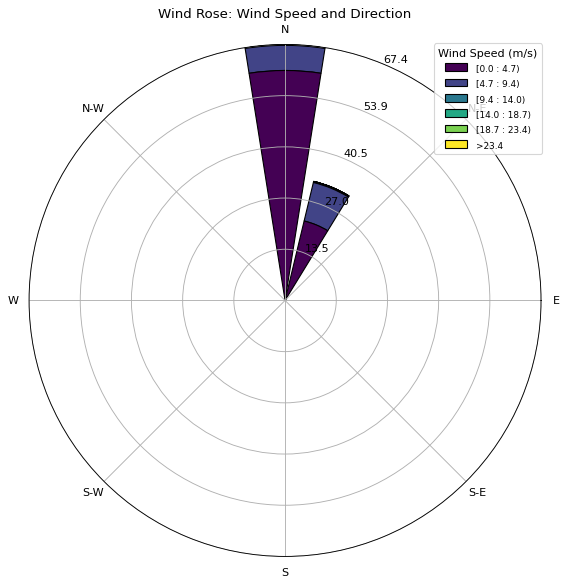

In [9]:
# Required imports


# Wind rose for wind speed (WS) and wind direction (WD)
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='black')
ax.set_title("Wind Rose: Wind Speed and Direction")
ax.set_legend(title="Wind Speed (m/s)", loc='upper right')
plt.show()


# Temperature Analysis: Examining RH's influence on temperature and solar radiation.

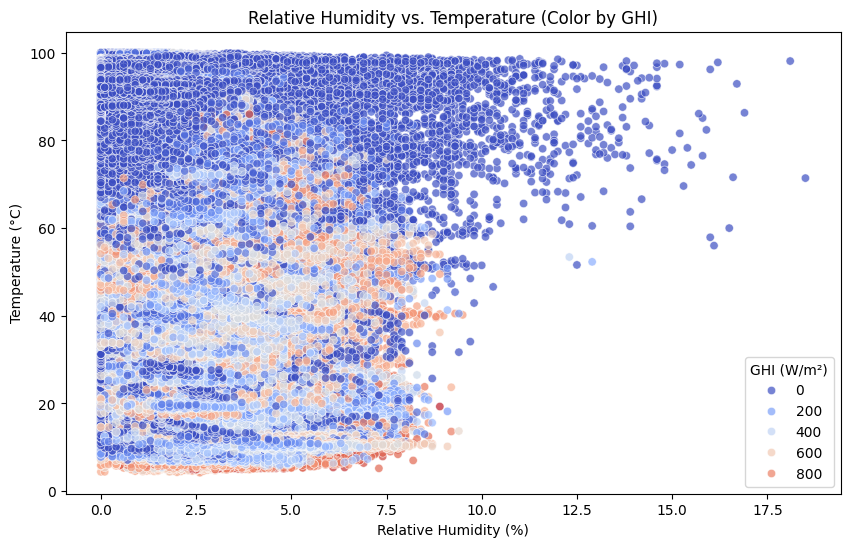

In [11]:
# Scatter plot: RH vs. Tamb
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=df['RH'], y=df['Tamb'], hue=df['GHI'], palette='coolwarm', alpha=0.7)

# Add title and labels
plt.title("Relative Humidity vs. Temperature (Color by GHI)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")

# Add a legend to represent the hue (GHI)
scatter_plot.legend(title="GHI (W/m²)")

plt.show()


# Histograms: Frequency distribution of key variables.

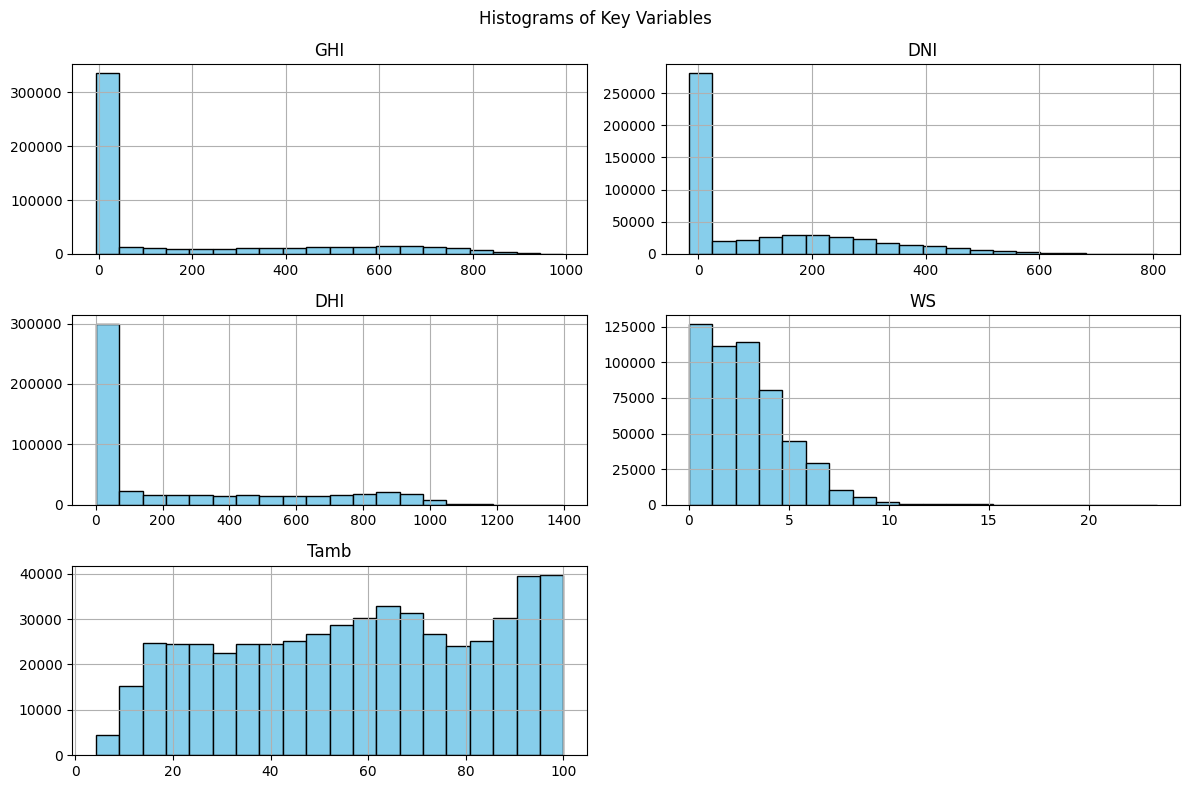

In [12]:
# Histogram for selected columns
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
df[columns_to_plot].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Key Variables")
plt.tight_layout()
plt.show()


# Z-Score Analysis: Flagging outliers.

In [13]:
from scipy.stats import zscore

# Calculate Z-scores for relevant numeric columns
numeric_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS']
z_scores = df[numeric_cols].apply(zscore)

# Flag rows where Z-score > 3 (outliers)
outliers = (z_scores.abs() > 3)
outlier_counts = outliers.sum()
print("Number of outliers in each column:")
print(outlier_counts)

# Display flagged outliers
outlier_rows = df[outliers.any(axis=1)]
print("Outlier Rows:")
print(outlier_rows)


Number of outliers in each column:
GHI      106
DNI     3977
DHI       77
Tamb       0
WS      3433
dtype: int64
Outlier Rows:
                                GHI    DNI    DHI   ModA  ModB  Tamb    RH  \
Timestamp                                                                    
1970-01-01 00:00:00.000000016  -0.5   15.8   19.0   18.9  29.8  77.5   6.6   
1970-01-01 00:00:00.000000005  -1.5    6.2    9.6    9.6  29.1  72.4  11.3   
1970-01-01 00:00:00.000000000  -1.6    0.9    5.7    5.7  27.6  72.3  10.0   
1969-12-31 23:59:59.999999998  -1.0   -1.3    4.3    4.3  26.4  76.0   9.4   
1969-12-31 23:59:59.999999997  -1.0   -2.4    3.9    3.9  25.6  79.5   9.7   
...                             ...    ...    ...    ...   ...   ...   ...   
1970-01-01 00:00:00.000000356   0.3  354.6  351.3  350.0  26.2  84.0   8.1   
1970-01-01 00:00:00.000000278   0.2  277.3  270.9  269.1  25.9  84.6   8.0   
1970-01-01 00:00:00.000000354   0.5  352.3  338.9  336.6  25.6  84.9   7.4   
1970-01-01 00:0

# Bubble Chart: Exploring relationships between variables.

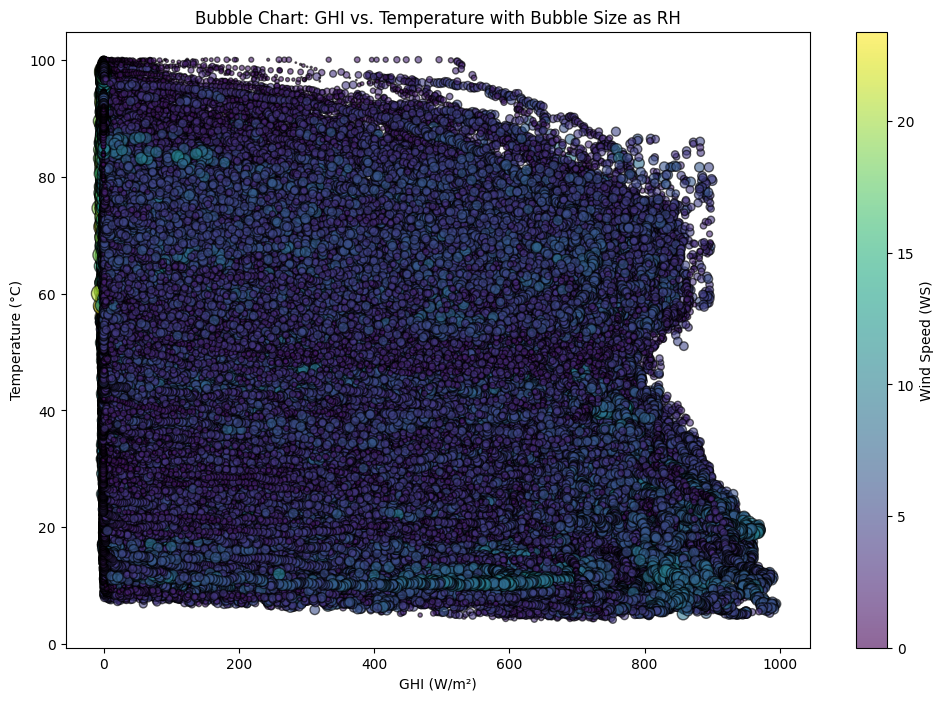

In [14]:
# Bubble chart: GHI vs. Tamb vs. WS with bubble size as RH
plt.figure(figsize=(12, 8))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.6, c=df['WS'], cmap='viridis', edgecolor='k')
plt.colorbar(label='Wind Speed (WS)')
plt.title("Bubble Chart: GHI vs. Temperature with Bubble Size as RH")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Temperature (°C)")
plt.show()


# Data Cleaning: Handling missing and anomalous data.

In [15]:
# Drop the 'Comments' column as it appears entirely null
df.drop(columns=['Comments'], inplace=True)

# Handle missing values by filling with column means for numeric data
df.fillna(df.mean(), inplace=True)

# Remove rows flagged as outliers from Z-score analysis
df_cleaned = df[~outliers.any(axis=1)]

print("Shape of the cleaned dataset:", df_cleaned.shape)


Shape of the cleaned dataset: (518051, 17)


/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_973/4251464605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Comments'], inplace=True)
/var/folders/8d/kl24b_0s3gx0jhkqll61_jmm0000gn/T/ipykernel_973/4251464605.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True)
